In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read in first file, years 2010-2012, set index column and view first 5 rows
BC_2010 = pd.read_excel('BC10-12.xlsx', index_col='Account')
BC_2010.head()

,Description,Str .,Str Name,Unit #,City,Total SqFt,Year Built,Date of Sale,Reception No,Sale Price,Adj Sale Price,Time Adj Sale Price,Status Code
Account,,,,,,,,,,,,,
R0076720,BANKS,2001,MAIN,NaN,LONGMONT,8178,1978,2008-04-03,2921099,1500000,1350000,1274670,A
R0011136,INDUSTRIAL OFFICE,1965,57TH,NaN,BOULDER,27816,1995,2011-10-28,3180870,3087300,3087300,3087300,A
R0011767,INDUSTRIAL OFFICE,1995,57TH,NaN,BOULDER,36554,2002,2011-10-28,3180871,3983600,3983600,3983600,A
R0030003,INDUSTRIAL OFFICE,2990,CENTER GREEN,NaN,BOULDER,10600,1985,2008-11-14,2964724,1365000,1365000,1306032,A
R0033880,INDUSTRIAL OFFICE,4571,BROADWAY,NaN,BOULDER,15721,1968,2007-12-21,2901744,1725000,1725000,1616325,A


In [4]:
#View column names and dtypes
BC_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, R0076720 to R0500982
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Description          238 non-null    object        
 1   Str .                238 non-null    int64         
 2   Str Name             238 non-null    object        
 3   Unit #               3 non-null      object        
 4   City                 238 non-null    object        
 5   Total SqFt           238 non-null    int64         
 6   Year Built           238 non-null    int64         
 7   Date of Sale         238 non-null    datetime64[ns]
 8   Reception No         238 non-null    int64         
 9   Sale Price           238 non-null    int64         
 10  Adj Sale Price       238 non-null    int64         
 11  Time Adj Sale Price  238 non-null    int64         
 12  Status Code          238 non-null    object        
dtypes: datetime64[ns](1), int64(

In [5]:
#Combine several columns for a complete 'Property Address', drop unnecessary columns
BC_2010['Unit #'].fillna('', inplace=True)
BC_2010['Property Address'] = BC_2010['Str .'].map(str) + ' ' + BC_2010['Str Name'].map(str) + ' ' + BC_2010['Unit #'].map(str)
BC_2010 = BC_2010.drop(['Str .', 'Str Name', 'Adj Sale Price', 'Status Code', 'Unit #'], axis=1)
BC_2010.rename(columns = {'Date of Sale': 'Sale Date'}, inplace=True)
BC_2010.info()
BC_2010.shape

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, R0076720 to R0500982
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Description          238 non-null    object        
 1   City                 238 non-null    object        
 2   Total SqFt           238 non-null    int64         
 3   Year Built           238 non-null    int64         
 4   Sale Date            238 non-null    datetime64[ns]
 5   Reception No         238 non-null    int64         
 6   Sale Price           238 non-null    int64         
 7   Time Adj Sale Price  238 non-null    int64         
 8   Property Address     238 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 18.6+ KB


(238, 9)

In [6]:
#Put columns in correct order
cols = ['Description', 'Property Address', 'City', 'Total SqFt', 'Year Built', 'Sale Date',
       'Reception No', 'Sale Price', 'Time Adj Sale Price']
BC_2010 = BC_2010[cols]
BC_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, R0076720 to R0500982
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Description          238 non-null    object        
 1   Property Address     238 non-null    object        
 2   City                 238 non-null    object        
 3   Total SqFt           238 non-null    int64         
 4   Year Built           238 non-null    int64         
 5   Sale Date            238 non-null    datetime64[ns]
 6   Reception No         238 non-null    int64         
 7   Sale Price           238 non-null    int64         
 8   Time Adj Sale Price  238 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 18.6+ KB


In [7]:
#Read in second table and view columns
BC_2012 = pd.read_excel('BC12-14.xlsx')
BC_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Account Number        442 non-null    object        
 1   Description           442 non-null    object        
 2   Property Address      442 non-null    object        
 3   City                  442 non-null    object        
 4   Total SF              442 non-null    int64         
 5   Year Built            442 non-null    int64         
 6   Eff YR Built          442 non-null    int64         
 7   Sales Date            442 non-null    datetime64[ns]
 8   Reception No          442 non-null    object        
 9   Sales Price           442 non-null    int64         
 10  Time Adj Sales Price  442 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 38.1+ KB


In [8]:
#Rename columns to conform with BC_2010, set index, and drop extra columns
BC_2012.rename(columns = {'Account Number': 'Account', 'Total SF': 'Total SqFt', 'Sales Date': 'Sale Date',
                         'Sales Price': 'Sale Price', 'Time Adj Sales Price': 'Time Adj Sale Price'},
              inplace = True)
BC_2012.set_index('Account', inplace=True)
BC_2012 = BC_2012.drop('Eff YR Built', axis=1)
BC_2012.info()
BC_2012.shape

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, R0049687 to R0502114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Description          442 non-null    object        
 1   Property Address     442 non-null    object        
 2   City                 442 non-null    object        
 3   Total SqFt           442 non-null    int64         
 4   Year Built           442 non-null    int64         
 5   Sale Date            442 non-null    datetime64[ns]
 6   Reception No         442 non-null    object        
 7   Sale Price           442 non-null    int64         
 8   Time Adj Sale Price  442 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 34.5+ KB


(442, 9)

In [9]:
#Read in third table and view columns
BC_2014 = pd.read_excel('BC14-16.xlsx', index_col='Account')
BC_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, R0000267 to R0900131
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Description          604 non-null    object        
 1   Property Address     604 non-null    object        
 2   City                 596 non-null    object        
 3   Total SqFt           604 non-null    int64         
 4   Year Built           604 non-null    int64         
 5   Eff Yr Blt           604 non-null    int64         
 6   Sale Date            604 non-null    datetime64[ns]
 7   Reception No         604 non-null    object        
 8   Sale Price           604 non-null    int64         
 9   Time Adj Sale Price  604 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 51.9+ KB


In [10]:
#Drop irrelevant column
BC_2014 = BC_2014.drop('Eff Yr Blt', axis=1)
BC_2014.info()
BC_2014.shape

<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, R0000267 to R0900131
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Description          604 non-null    object        
 1   Property Address     604 non-null    object        
 2   City                 596 non-null    object        
 3   Total SqFt           604 non-null    int64         
 4   Year Built           604 non-null    int64         
 5   Sale Date            604 non-null    datetime64[ns]
 6   Reception No         604 non-null    object        
 7   Sale Price           604 non-null    int64         
 8   Time Adj Sale Price  604 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 47.2+ KB


(604, 9)

In [11]:
#Read in fourth table & view columns
BC_2016 = pd.read_excel('BC16-18.xlsx', index_col='Account')
BC_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, R0051566 to R0900029
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Description          652 non-null    object        
 1   Property Address     652 non-null    object        
 2   City                 647 non-null    object        
 3   Total SqFt           652 non-null    int64         
 4   Year Built           652 non-null    int64         
 5   Eff Yr Blt           652 non-null    int64         
 6   Sale Date            652 non-null    datetime64[ns]
 7   Reception No         652 non-null    object        
 8   Sale Price           652 non-null    object        
 9   Time Adj Sale Price  652 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.0+ KB


In [12]:
#Drop irrelevant column
BC_2016 = BC_2016.drop('Eff Yr Blt', axis=1)
BC_2016.info()
BC_2016.shape

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, R0051566 to R0900029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Description          652 non-null    object        
 1   Property Address     652 non-null    object        
 2   City                 647 non-null    object        
 3   Total SqFt           652 non-null    int64         
 4   Year Built           652 non-null    int64         
 5   Sale Date            652 non-null    datetime64[ns]
 6   Reception No         652 non-null    object        
 7   Sale Price           652 non-null    object        
 8   Time Adj Sale Price  652 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 50.9+ KB


(652, 9)

In [13]:
#Concatenate all four tables horizontally
BC = pd.concat([BC_2010, BC_2012, BC_2014, BC_2016], axis=0)
BC.shape
#Output shows the rows add up 

(1936, 9)

In [14]:
#Check first few rows to ensure data came through properly
BC.head()

,Description,Property Address,City,Total SqFt,Year Built,Sale Date,Reception No,Sale Price,Time Adj Sale Price
Account,,,,,,,,,
R0076720,BANKS,2001 MAIN,LONGMONT,8178,1978,2008-04-03,2921099,1500000,1274670
R0011136,INDUSTRIAL OFFICE,1965 57TH,BOULDER,27816,1995,2011-10-28,3180870,3087300,3087300
R0011767,INDUSTRIAL OFFICE,1995 57TH,BOULDER,36554,2002,2011-10-28,3180871,3983600,3983600
R0030003,INDUSTRIAL OFFICE,2990 CENTER GREEN,BOULDER,10600,1985,2008-11-14,2964724,1365000,1306032
R0033880,INDUSTRIAL OFFICE,4571 BROADWAY,BOULDER,15721,1968,2007-12-21,2901744,1725000,1616325


In [15]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, R0076720 to R0900029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Description          1936 non-null   object        
 1   Property Address     1936 non-null   object        
 2   City                 1923 non-null   object        
 3   Total SqFt           1936 non-null   int64         
 4   Year Built           1936 non-null   int64         
 5   Sale Date            1936 non-null   datetime64[ns]
 6   Reception No         1936 non-null   object        
 7   Sale Price           1936 non-null   object        
 8   Time Adj Sale Price  1936 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 151.2+ KB


In [16]:
#Change format in 'Sale Price' & 'Time Adj Sale Price' so all conform to same format & calculations are possible
BC['Sale Price'] = BC['Sale Price'].replace({'\$': '', ',': ''}, regex=True)
BC['Time Adj Sale Price'] = BC['Time Adj Sale Price'].replace({'\$': '', ',': ''}, regex=True)

In [17]:
#Change 'Sale Price' & 'Adj Sale Price' to float (so can change to int)
BC['Sale Price'] = BC['Sale Price'].astype(float)
BC['Time Adj Sale Price'] = BC['Time Adj Sale Price'].astype(float)

In [18]:
#Change floats to int for sake of mathematical analysis
BC['Sale Price'] = BC['Sale Price'].astype(int)
BC['Time Adj Sale Price'] = BC['Time Adj Sale Price'].astype(int)

In [19]:
#Count duplicate rows
duprows = BC[BC.duplicated()]
duprows.count()

Description            89
Property Address       89
City                   84
Total SqFt             89
Year Built             89
Sale Date              89
Reception No           89
Sale Price             89
Time Adj Sale Price    89
dtype: int64

In [20]:
#Drop duplicates and check correct amount of rows were dropped
BC = BC.drop_duplicates(keep='first')
BC.shape

(1847, 9)

In [21]:
#Find rows will null values
null_data = BC[BC.isnull().any(axis=1)]
null_data

,Description,Property Address,City,Total SqFt,Year Built,Sale Date,Reception No,Sale Price,Time Adj Sale Price
Account,,,,,,,,,
R0900034,FAST FOOD,27 WOLFENSBERGER RD,NaN,4124,2011,2012-11-01,9999999,1990000,1990000
R0900035,MINI MART CONVENIENCE STORE,5898 BROADWAY,NaN,2333,1986,2013-04-30,9999999,1510000,1510000
R0900058,RESTAURANT,10230 ARAPAHOE RD,NaN,4125,1997,2014-07-16,9999999,1261835,1261800
R0900061,CAR DEALER,3870 BYRD DR,NaN,26300,2007,2014-07-22,9999999,3500000,3500000
R0900068,AUTOCENTER,137 NICKEL ST,NaN,5759,1973,2012-08-14,9999999,777000,777000
R0900069,AUTOCENTER,1525 KIPLING PKY,NaN,3496,1998,2015-12-04,999999,1541400,1541400
R0900070,AUTOCENTER,5594 GIBRALTAR WAY,NaN,6948,2001,2015-06-17,9999999,1920000,1920000
R0900071,AUTOCENTER,9480 FEDERAL BLVD,NaN,3720,1998,2015-02-18,9999999,600000,600000


In [22]:
#Fill in missing values for 'City'
BC.loc['R0900034', 'City'] = 'CASTLE ROCK'
BC.loc['R0900035', 'City'] = 'LITTLETON'
BC.loc['R0900058', 'City'] = 'ENGLEWOOD'
BC.loc['R0900061', 'City'] = 'LOVELAND'
BC.loc['R0900068', 'City'] = 'BROOMFIELD'
BC.loc['R0900069', 'City'] = 'LAKEWOOD'
BC.loc['R0900070', 'City'] = 'CENTENNIAL'
BC.loc['R0900071', 'City'] = 'DENVER'

In [23]:
#Check to ensure there are no more null values
BC.isna().sum()

Description            0
Property Address       0
City                   0
Total SqFt             0
Year Built             0
Sale Date              0
Reception No           0
Sale Price             0
Time Adj Sale Price    0
dtype: int64

In [24]:
#Check unique values for 'Description'
BC.groupby('Description').count()
#Shows that 'Bank' & 'Banks' along with 'Restuarant' & 'Restaurants' need to be combined

,Property Address,City,Total SqFt,Year Built,Sale Date,Reception No,Sale Price,Time Adj Sale Price
Description,,,,,,,,
AUTO SHOWROOM,2,2,2,2,2,2,2,2
AUTOCENTER,52,52,52,52,52,52,52,52
BANK,25,25,25,25,25,25,25,25
BANKS,1,1,1,1,1,1,1,1
BANQUET HALL,1,1,1,1,1,1,1,1
CAR DEALER,16,16,16,16,16,16,16,16
CAR WASH AUTOMATIC,1,1,1,1,1,1,1,1
CAR WASH DRIVE THRU,12,12,12,12,12,12,12,12
COCKTAIL LOUNGE,4,4,4,4,4,4,4,4


In [25]:
#replace names so bank & restaurant combine like names
BC['Description'] = BC['Description'].replace(['RESTAURANTS'], 'RESTAURANT')
BC['Description'] = BC['Description'].replace(['BANKS'], 'BANK')

In [26]:
#Add column for 'Price per SqFt'
BC['Price per SqFt'] = round(BC['Sale Price'] / BC['Total SqFt'], 2)

In [27]:
BC.head()

,Description,Property Address,City,Total SqFt,Year Built,Sale Date,Reception No,Sale Price,Time Adj Sale Price,Price per SqFt
Account,,,,,,,,,,
R0076720,BANK,2001 MAIN,LONGMONT,8178,1978,2008-04-03,2921099,1500000,1274670,183.42
R0011136,INDUSTRIAL OFFICE,1965 57TH,BOULDER,27816,1995,2011-10-28,3180870,3087300,3087300,110.99
R0011767,INDUSTRIAL OFFICE,1995 57TH,BOULDER,36554,2002,2011-10-28,3180871,3983600,3983600,108.98
R0030003,INDUSTRIAL OFFICE,2990 CENTER GREEN,BOULDER,10600,1985,2008-11-14,2964724,1365000,1306032,128.77
R0033880,INDUSTRIAL OFFICE,4571 BROADWAY,BOULDER,15721,1968,2007-12-21,2901744,1725000,1616325,109.73


<AxesSubplot:xlabel='Year Built', ylabel='Sale Price'>

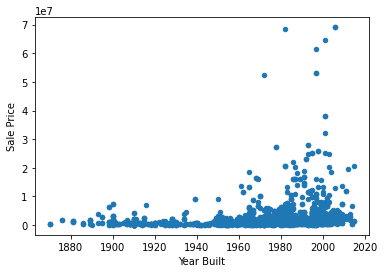

In [28]:
#plot Sale Price vs Year Built
BC.plot(x='Year Built', y='Sale Price', kind='scatter')
#shows newer buildings have increased sale prices

In [29]:
#View Sale Price aggregate info by City
BCbyCity = BC.pivot_table(values='Sale Price', index='City', aggfunc=[np.min, np.median, np.max])
BCbyCity

,amin,median,amax
,Sale Price,Sale Price,Sale Price
City,,,
ARVADA,1230000,2690000.0,4150000
AURORA,975000,1567500.0,2680000
BOULDER,210000,2040000.0,61400000
BROOMFEILD,5595000,5595000.0,5595000
BROOMFIELD,650000,5595000.0,19500000
CASTLE ROCK,1990000,1990000.0,1990000
CENTENNIAL,465000,2160000.0,3062675
DENVER,600000,4300000.0,8000000


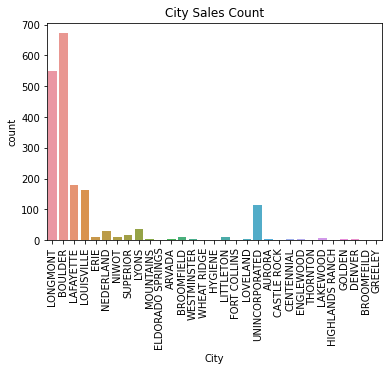

In [30]:
#View City Sales as count bar graph
sns.countplot(x=BC['City'])
plt.xticks(rotation=90)
plt.title("City Sales Count")
plt.show()

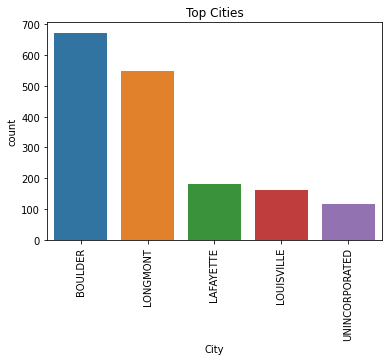

In [31]:
#View top cities as their own graph for easier view
Top_Cities = BC.loc[BC.City.isin(['BOULDER',
                                 'LONGMONT',
                                 'LAFAYETTE',
                                 'LOUISVILLE',
                                 'UNINCORPORATED'])]
sns.countplot(x=Top_Cities['City'],
             order = Top_Cities['City'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Top Cities")
plt.show()

In [32]:
#Create subset of only Boulder sales
OnlyBoulder = BC[BC['City'] == 'BOULDER']
OnlyBoulder.head()

,Description,Property Address,City,Total SqFt,Year Built,Sale Date,Reception No,Sale Price,Time Adj Sale Price,Price per SqFt
Account,,,,,,,,,,
R0011136,INDUSTRIAL OFFICE,1965 57TH,BOULDER,27816,1995,2011-10-28,3180870,3087300,3087300,110.99
R0011767,INDUSTRIAL OFFICE,1995 57TH,BOULDER,36554,2002,2011-10-28,3180871,3983600,3983600,108.98
R0030003,INDUSTRIAL OFFICE,2990 CENTER GREEN,BOULDER,10600,1985,2008-11-14,2964724,1365000,1306032,128.77
R0033880,INDUSTRIAL OFFICE,4571 BROADWAY,BOULDER,15721,1968,2007-12-21,2901744,1725000,1616325,109.73
R0035519,INDUSTRIAL OFFICE,1840 55TH,BOULDER,7630,1969,2009-12-31,3051194,1100000,1078220,144.17


In [33]:
#Use pivot table to view avg Boulder Price per Sqft based on Description
OnlyBoulderPriceSqft = OnlyBoulder.pivot_table(values='Price per SqFt', index='Description')
OnlyBoulderPriceSqft

,Price per SqFt
Description,
AUTOCENTER,390.868571
BANK,2718.830000
CAR DEALER,217.088750
COCKTAIL LOUNGE,365.405000
DAYCARE,357.477143
DENTAL OFFICE,355.360000
DISCOUNT STORE,93.170000
ENGINEERING/RESEARCH,132.191818
FAST FOOD,633.310000


In [35]:
#View top 10 values from Boulder pivot table
TopBoulder = OnlyBoulderPriceSqft.nlargest(10, 'Price per SqFt')
TopBoulder

,Price per SqFt
Description,
BANK,2718.830000
MINI MART CONVENIENCE STORE,1619.957143
FAST FOOD,633.310000
"HOTEL, FULL SERVICE",501.880000
RESTAURANT,485.332609
SERVICE STATION,401.050000
SCHOOL,395.056667
AUTOCENTER,390.868571
MINI LUBE,380.600000


<AxesSubplot:title={'center':'Boulder Price per SqFt based on Description'}, xlabel='Description'>

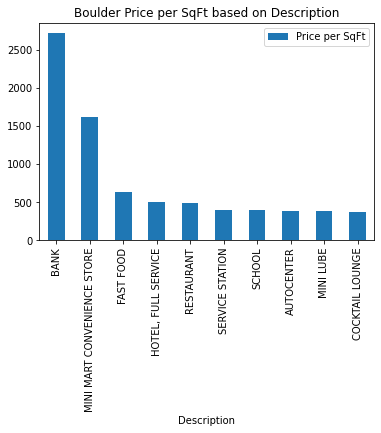

In [36]:
#Show bar graph representation of data
TopBoulder.plot(kind='bar', title="Boulder Price per SqFt based on Description")